In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.utils import Bunch
import seaborn as sns

In [43]:
training_data = pd.read_csv('Capstone #2 training data.csv') # First mentor meeting, don't specify the 'r' mode otherwise data will be a mess
testing_data = pd.read_csv('Capstone #2 test data.csv')

In [44]:
training_data.head() # Don't specify the print function and the DataFrame will be presented this way

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
training_data['ApplicantIncome'] = training_data['ApplicantIncome'].astype("float64")

In [48]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


It looks like there are 614 observations in total and the following columns have NaN values; Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.  Before deciding what to do with the missing values, we will explore the data first.

# Exploratory Data Analysis

### Categorical Variables: Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property Area

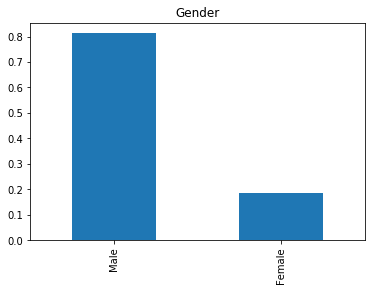

In [49]:
training_data["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')
plt.show()

There are more males than females.  Therefore the NaN values will be imputed with males.

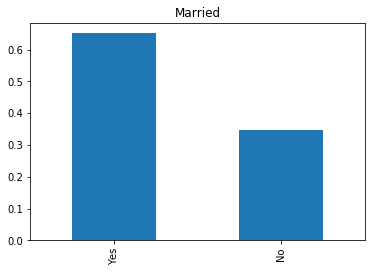

In [50]:
training_data["Married"].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

There are more married applicants.  Therefore the NaN values will be imputed with married applicants

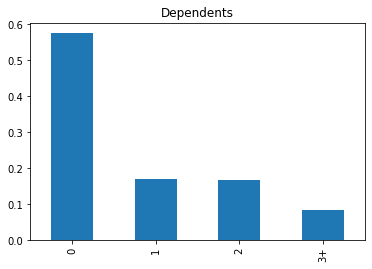

In [51]:
training_data["Dependents"].value_counts(normalize=True).plot.bar(title='Dependents')

The majority have no dependents, therefore the NaN values will be imputed with 0 dependents.

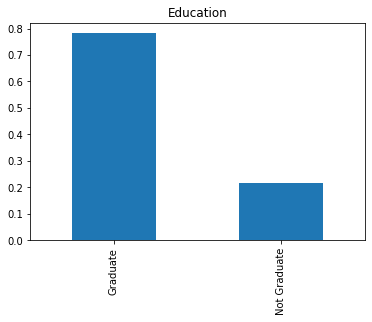

In [52]:
training_data["Education"].value_counts(normalize=True).plot.bar(title='Education')

The majority are graduates.  But there are no NaN values here, therefore no imputation is required.

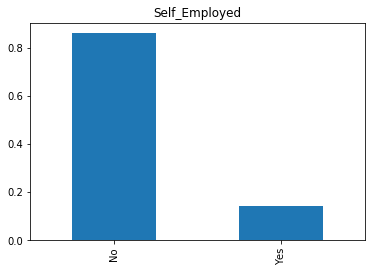

In [53]:
training_data["Self_Employed"].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

The majority of applicants are not self-employed, therefore the NaN values will be imputed with not self_employed

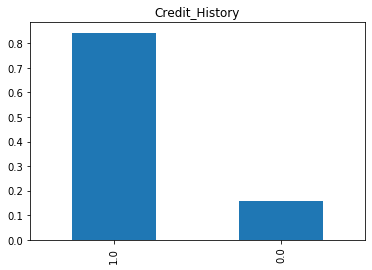

In [54]:
training_data["Credit_History"].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

The credit history majority has 1.0.  Therefore the NaN values will be imputed as 1.0

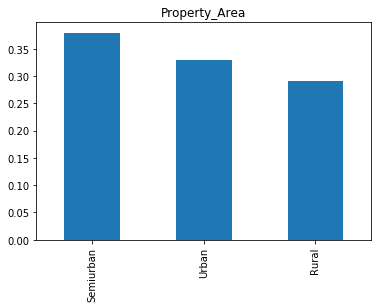

In [55]:
training_data["Property_Area"].value_counts(normalize=True).plot.bar(title='Property_Area')

There are no NaN values for property area, therefore no imputation is required.  Most are Semiurban, but the distribution is fairly even.

### Numerical Variables: ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term

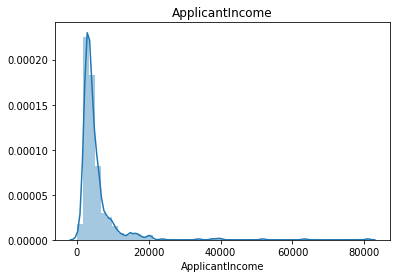

In [56]:
sns.distplot(training_data['ApplicantIncome']) # Add a Title?
plt.title("ApplicantIncome")
plt.show() # For tree based models, no logarithmic distributions are neccessary.

The applicant income shows a curve with a right tail.  There are quite a few outliers to the right.  These can easily be fixed by taking a logarithmic scale where the higher datapoints will be moderated.

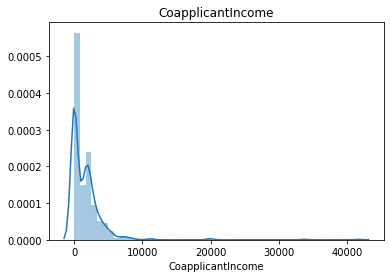

In [57]:
sns.distplot(training_data['CoapplicantIncome'])
plt.title("CoapplicantIncome")
plt.show() 

The coapplicant income follows the same pattern. There is a double hump in this curve, but albet with more data this will change into the same figure as the applicant income.  This can also be treated the same by taking the logarithmic scale.

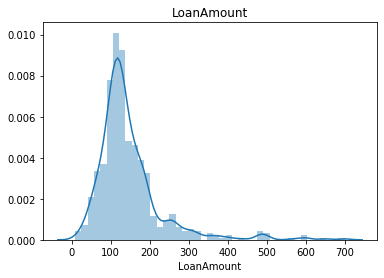

In [58]:
sns.distplot(training_data['LoanAmount'])
plt.title("LoanAmount")
plt.show()

The loan amount is also a curve with a tail to the right.

C:\Users\Matt\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Matt\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


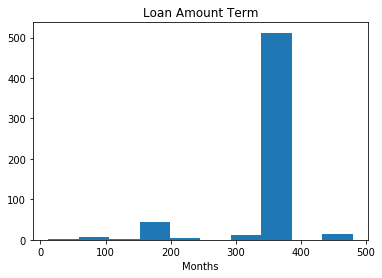

In [59]:
plt.hist(training_data['Loan_Amount_Term']) # Howcome this one is different?
plt.title("Loan Amount Term")
plt.xlabel("Months")
plt.show()

Most people seem to apply to have the loan for a term of 360 months.

In [60]:
training_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

The numerical values here are rather discrete than continious as in the applicant and coapplicant income.  Since the most common value is 360.0, this will be the value imputed for the NaN values of this column.

In [61]:
Married = pd.crosstab(training_data['Married'], training_data['Loan_Status'])
Dependents = pd.crosstab(training_data['Dependents'], training_data['Loan_Status'])
Education = pd.crosstab(training_data['Education'], training_data['Loan_Status'])
Self_Employed = pd.crosstab(training_data['Self_Employed'], training_data['Loan_Status'])
Credit_History = pd.crosstab(training_data['Credit_History'], training_data['Loan_Status'])
Property_Area = pd.crosstab(training_data['Property_Area'], training_data['Loan_Status'])

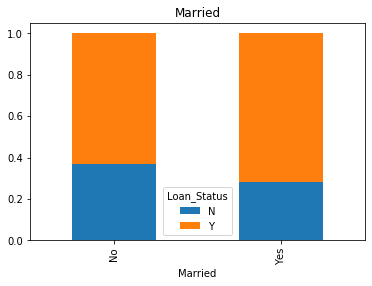

In [62]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Married")
plt.show()

More applicants are not married.  Therefore all missing values will be imputed as not married.  There is a clear pattern that applicants who are married stand a higher chance at getting granted a loan.

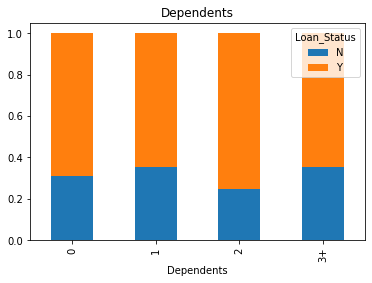

In [63]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Dependents")
plt.show()

There is no clear pattern between whether or not a loan is granted and the number of dependents.  Values that are missing or display a '3+' will be replaced/imputed with a value of 3.

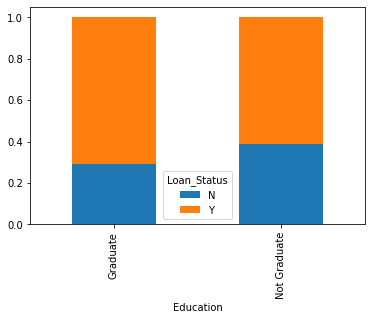

In [64]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

No values need to be imputed for education since there are 614 entries.  There is a clear pattern that more loans are granted to educated applicants.

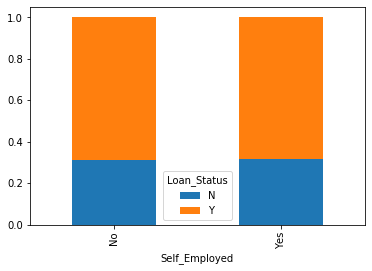

In [65]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

There is an independent relationship between getting granted a loan and whether or not the applicant is self-employed.

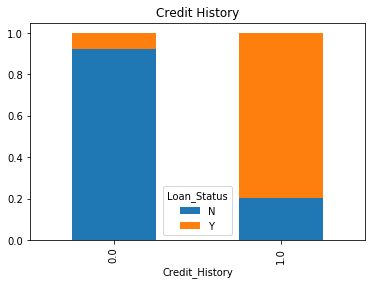

In [66]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Credit History")
plt.show()

Credit history is judged as binary.  Bad credit is 0.0 and good credit is 1.0.  It is clear that applicants with bad credit will probably not be granted a loan.

Does income affect an applicant's chances of getting a loan?  To answer this question, the income values need to be categorized and crosstab bar charts for income and loan status can be created to show this.

Create a new column in the training data that categorizes the Applicant Income as Low, Medium, High or Very High.

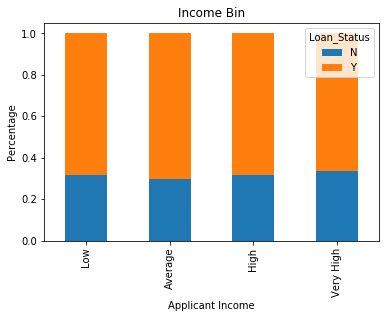

In [67]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
training_data['Income_bin'] = pd.cut(training_data['ApplicantIncome'], bins = bins, labels = group)
Income_bin = pd.crosstab(training_data['Income_bin'], training_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Income Bin")
plt.xlabel("Applicant Income")
plt.ylabel("Percentage")
plt.show()

So far, it seems that income does not have a strong affect on an applicant's chances of being approved.  To make sure of this, the coapplicant income will be analyzed in a simmilar manor.  A new column summing the applicant and coapplicant incomes will be created and analyzed in a simmilar way to strongly support/refute the hypothesis that income affects chances of getting a loan.

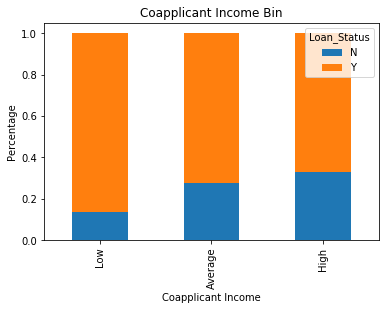

In [68]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
training_data['CoapplicantIncome_bin'] = pd.cut(training_data['CoapplicantIncome'], bins, labels = group)
CoapplicantIncome_bin = pd.crosstab(training_data['CoapplicantIncome_bin'], training_data['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Coapplicant Income Bin")
plt.xlabel("Coapplicant Income")
plt.ylabel("Percentage")
plt.show()

The relationship between coapplicant income and loan status is pretty clear that coapplicants with higher incomes are less likely to get a loan approved and those coapplicants with lower income are more likely to get approved a loan.

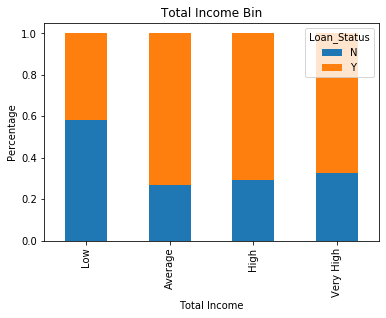

In [69]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
training_data['Total_Income_bin'] = training_data['ApplicantIncome'] + training_data['CoapplicantIncome']
training_data['Total_Income_bin'] = pd.cut(training_data['Total_Income_bin'], bins, labels = group)
Total_Income_bin = pd.crosstab(training_data['Total_Income_bin'], training_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Total Income Bin")
plt.xlabel("Total Income")
plt.ylabel("Percentage")
plt.show()

The combination of applicant and coapplicant incomes show a clear relationship that if an applicants income is low, they are less likely to be approved for a loan.  However, if their income is average or higher, the relationship between loan status and income becomes independent.

The loan Amount veriable can be categorized and analyzed like the previous variables.  The next hypothesis to test is whether or not there is a relationship between Loan Term and loan status.  The hypothesis that follows is that applicants that want to borrow money for a shorter period of time will stand a higher chance at getting a loan.

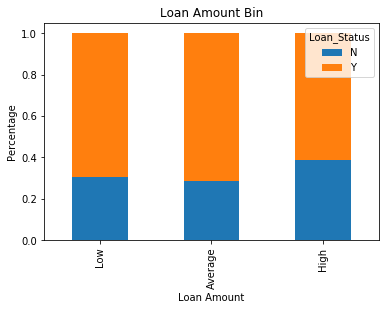

In [70]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
training_data['LoanAmount_bin'] = pd.cut(training_data['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(training_data['LoanAmount_bin'], training_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Loan Amount Bin")
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")
plt.show()

High loan amounts stand a lower chance at loan approval.  Therefore applicants lower asking amounts will stand a higher chance at loan approval.

### Data Wrangling Steps
#### Step 1: Quantize the target varaible replacing 0 for No and 1 for Yes.
#### Step 2: Drop the bins from the training data set.
#### Step 3: Change the 3+ in the dependents column to 3.
#### Step 4: Deal with missing values and outliers.

### Step 1: Quantize the target variable replacing 0 for No and 1 for yes.

In [71]:
training_data['Loan_Status'].replace('Y', '1', inplace=True)
training_data['Loan_Status'].replace('N', '0', inplace=True)
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,1,High,NaN,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0,High,Average,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,High,Average
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1,High,NaN,High,Average


Now the Loan_Status column is replaced with 1's and 0's.

### Step 2: Drop the bins from the training data set.

In [72]:
training_data = training_data.drop(['Income_bin', 'CoapplicantIncome_bin', 'Total_Income_bin', 'LoanAmount_bin'], axis=1)

### Step 3: Change the 3+ in the dependents column to 3.

In [73]:
training_data['Dependents'].replace('3+', '3', inplace=True) #The same needs to be done for the test data as well.

### Using a heat correlation map

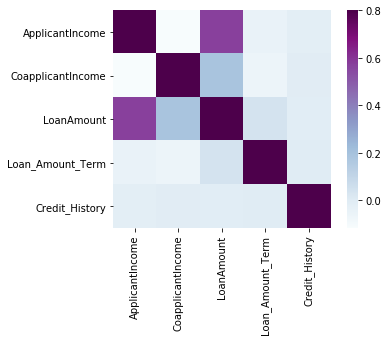

In [74]:
matrix = training_data.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

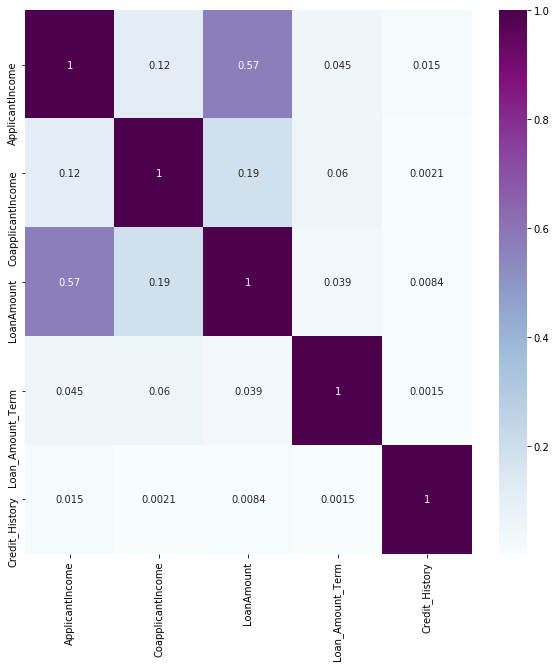

In [77]:
plt.figure(figsize = (10, 10))
training_data.corr().abs()
z = training_data.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')

These correlation heatmaps show a weak correlation; r<0.70 between the loan amount and the applicant income.  Interestingly, there is also a weak correlation between the incomes of the applicant and coapplicants.

## Missing Values And Outliers

In [78]:
training_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The following features listed above with values greater than 0 have missing values.  These missing values need to be imputed.  For categorical variables like gender, married, self-employed, dependents and credit history the mode will be imputed.

In [80]:
training_data['Gender'].fillna(training_data['Gender'].mode()[0], inplace = True)
training_data['Married'].fillna(training_data['Married'].mode()[0], inplace = True)
training_data['Dependents'].fillna(training_data['Dependents'].mode()[0], inplace = True)
training_data['Credit_History'].fillna(training_data['Credit_History'].mode()[0], inplace = True)
training_data['Self_Employed'].fillna(training_data['Self_Employed'].mode()[0], inplace = True)

In [81]:
training_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Having taken care of the missing values for the categorical variables by filling them in with the mode.  Numerical variables like loan amount term and loan amount will be delt with separately below.

### Loan Amount Term

Following the loan amount term graph, the value counts should reveal the mode to be 360.0, which is the value to be imputed.

In [82]:
training_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [83]:
training_data['Loan_Amount_Term'].fillna(training_data['Loan_Amount_Term'].mode()[0], inplace = True)

### Loan Amount

The loan amount distribution was illustrated in the graph above.  The distribution has a right tail containing high outliers.  Because of this, the median will be used to impute the missing values instead of the mean.

In [85]:
training_data['LoanAmount'].fillna(training_data['LoanAmount'].median(), inplace = True)

Now all the missing values are taken care of.  As illustrated below.

In [86]:
training_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


### Finding other correlations

From the heat map previously used, only float64 types were used.  The Loan status column values can be converted to float64 and included on the correlation heat map.  The same will apply for dependents and property area and education.  Education will be quantized the same way Loan Status was with 1 in placement of Graduate and 0 in placement of Not Graduate.

In [91]:
training_data['Education'].replace('Graduate', '1', inplace=True)
training_data['Education'].replace('Not Graduate', '0', inplace=True)

In [93]:
training_data['Loan_Status'] = training_data['Loan_Status'].astype("float64")
training_data['Dependents'] = training_data['Dependents'].astype("float64")
training_data['Education'] = training_data['Education'].astype("float64")
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    float64
dtypes: float64(8), object(5)
memory usage: 62.5+ KB


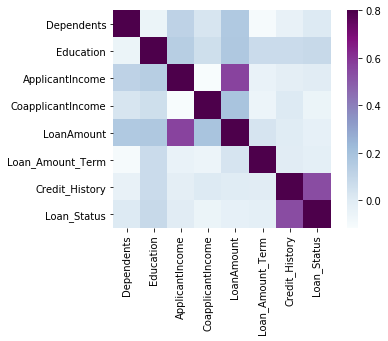

In [94]:
matrix = training_data.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

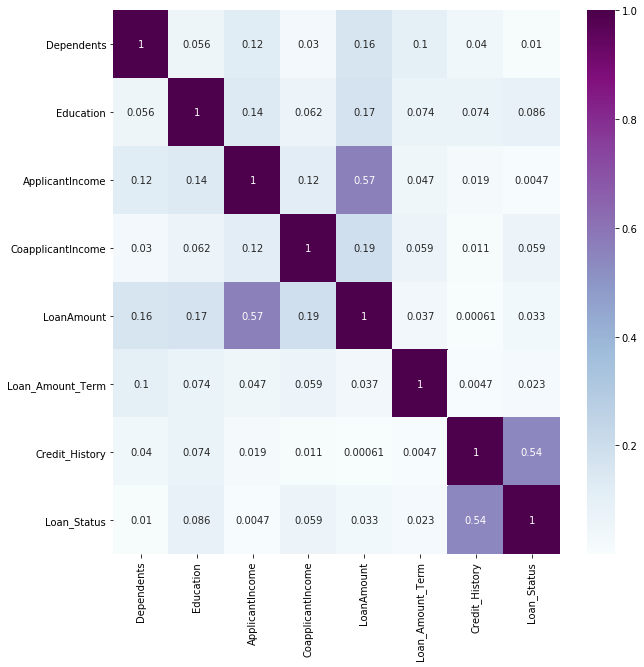

In [95]:
plt.figure(figsize = (10, 10))
training_data.corr().abs()
z = training_data.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')

There is a weak correlation; r < 0.70 between credit history and loan status.  This is the strongest dependent variable for determining the value of the target variable; Loan_Status.

The last issue that needs to be delt with are the high outliers with applicant income, coapplicant income and loan amount.  These three features will be measured logarithmically and stored as variables for later use.  The logarithmic distribution moderates the extreme values causing the distribution to take on a normal distribution.

### Loan Amount

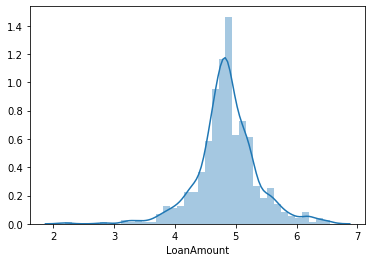

In [98]:
x = np.log(training_data['LoanAmount'])
sns.distplot(x)
plt.show()

### Applicant Income

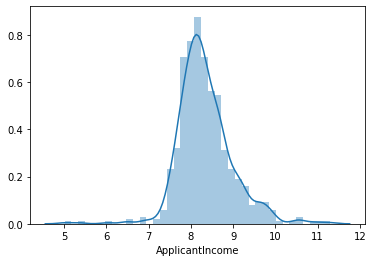

In [99]:
y = np.log(training_data['ApplicantIncome'])
sns.distplot(y)
plt.show()

### Coapplicant Income

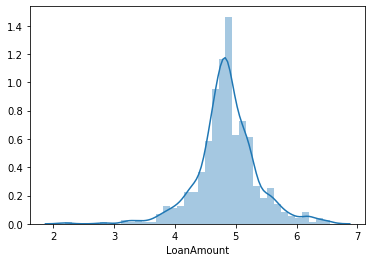

In [100]:
z = np.log(training_data['LoanAmount'])
sns.distplot(z)
plt.show()

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve




def run_regression_accuracy(X_train, y_train, X_test, y_test):
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
  cm = confusion_matrix(y_test, y_pred)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(y_test, y_pred))

  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  return logreg